### 第一个DEMO TSP

ACA_TSP参数列表及含义:

    + func  目标函数
    + n_dim  城市个数
    + size_pop  默认10, 蚂蚁数量
    + max_iter  默认20, 最大迭代次数
    + distance_matrix  城市之间的距离矩阵
    + alpha  默认1, 信息素的重要程度
    + beta  默认2, 适应度的重要程度
    + rho  默认0.1, 信息素的挥发速度

In [3]:
# 定义问题
import numpy as np
from scipy import spatial
import pandas as pd
import matplotlib.pyplot as plt

num_points = 25

points_coordinate = np.random.rand(num_points, 2)  # generate coordinate of points
distance_matrix = spatial.distance.cdist(points_coordinate, points_coordinate, metric='euclidean')


def cal_total_distance(routine):
    num_points, = routine.shape
    return sum([distance_matrix[routine[i % num_points], routine[(i + 1) % num_points]] for i in range(num_points)])

In [4]:
# 导包
from sko.ACA import ACA_TSP

aca = ACA_TSP(func=cal_total_distance, n_dim=num_points,
              size_pop=50, max_iter=200,
              distance_matrix=distance_matrix)

best_x, best_y = aca.run()

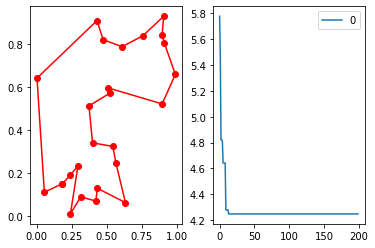

In [5]:
# 绘图
fig, ax = plt.subplots(1, 2)
best_points_ = np.concatenate([best_x, [best_x[0]]])
best_points_coordinate = points_coordinate[best_points_, :]
ax[0].plot(best_points_coordinate[:, 0], best_points_coordinate[:, 1], 'o-r')
pd.DataFrame(aca.y_best_history).cummin().plot(ax=ax[1])
plt.show()
